In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config
set_config(transform_output="pandas")

In [2]:
# ID of the Google Sheet for student food preferences
sheet_id = "1zsxedf5S4xSxfbrudc12rH0MMlcxJVSPn7soZcTNUfk"

# Title of the Google Sheet, which is the number after "gid" in the url.
sheet_name = "1050069865"

# URL to download the Google Sheet as a CSV
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"
#https://docs.google.com/spreadsheets/d/1zsxedf5S4xSxfbrudc12rH0MMlcxJVSPn7soZcTNUfk/edit?usp=sharing
# Create a Pandas DataFrame from the CSV data
moosic5000_df = pd.read_csv(url,
                       index_col=["name","id", "artist"])

# Dropping artist, id and html as we cant get the average from here.
to_drop = ['loudness', 'time_signature', 'type', 'html', 'duration_ms']
moosic5000_df = moosic5000_df.drop(columns=to_drop)

# First get the columns with PCA after standard scaling

In [3]:
moosic5000_df = moosic5000_df.loc[:, ~moosic5000_df.columns.str.contains('^Unnamed')]

In [4]:
# Number of samples
number_of_samples = moosic5000_df.shape[0]

# Create a QuantileTransformer object
scaler = QuantileTransformer(n_quantiles = number_of_samples)   #.set_output(transform="pandas")

# Transform the foods_df DataFrame
moosic5000_df_quantile = scaler.fit_transform(moosic5000_df)

In [5]:
moosic5000_df_quantile

,,,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,id,artist,,,,,,,,,,
Se Eu Quiser Falar Com Deus,1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,0.701662,0.145969,1.000000,0.0,0.615399,0.791173,0.385460,0.999045,0.376576,0.409534
Saudade De Bahia,5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,0.834066,0.206916,0.271207,1.0,0.155808,0.610145,0.268055,0.369316,0.762323,0.593332
"Canta Canta, Minha Gente",0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,0.962457,0.490638,0.271207,1.0,0.986626,0.717329,0.388804,0.491880,0.942205,0.196408
Mulher Eu Sei,3mXqOdlLE1k67WsAxryPFs,Chico César,0.780378,0.037830,0.392147,1.0,0.399217,0.864540,0.373710,0.919182,0.609954,0.371227
Rosa Morena,7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,0.689243,0.079862,0.544612,1.0,0.230225,0.883359,0.443256,0.343523,0.486339,0.529996
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,0.093810,0.050630,0.338556,1.0,0.403324,0.883932,0.768628,0.181028,0.078047,0.136798
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,0.076328,0.070883,0.544612,1.0,0.350210,0.850783,0.710451,0.107088,0.014807,0.106229
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,0.000191,0.000764,0.805885,1.0,0.336263,0.911253,0.998280,0.148357,0.010031,0.025411


In [6]:
# Initialise the PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(moosic5000_df_quantile)

# Transform scaled_features_df based on the fit calculations
pca_basic_df = pca.transform(moosic5000_df_quantile)

pca_basic_df

,,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
name,id,artist,,,,,,,,,,
Se Eu Quiser Falar Com Deus,1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,-0.729671,-0.139347,-0.248897,0.439848,0.422183,-0.313861,0.261424,0.164519,0.174058,-0.066481
Saudade De Bahia,5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,0.310666,-0.661455,-0.005181,-0.178715,0.014044,0.168588,-0.143364,0.012193,0.109340,-0.109011
"Canta Canta, Minha Gente",0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,0.244417,-0.465402,0.365942,-0.072702,-0.352514,-0.383829,0.171351,0.495418,-0.043904,0.066701
Mulher Eu Sei,3mXqOdlLE1k67WsAxryPFs,Chico César,0.313472,-0.569567,-0.191460,0.006066,0.341278,-0.335777,0.112596,0.238358,0.132429,-0.096087
Rosa Morena,7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,0.326745,-0.519573,-0.379956,0.108301,0.019988,0.160737,0.066398,0.069197,0.132151,0.002787
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,0.499826,0.060160,-0.881613,-0.030762,-0.292363,-0.105121,0.193328,-0.073322,-0.066330,-0.014258
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,0.473496,0.075651,-0.896363,0.172336,-0.331510,-0.052487,0.166777,-0.186029,-0.039580,-0.006876
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,0.475609,0.214132,-1.105388,0.428370,-0.300664,-0.055840,0.084000,0.003408,-0.079615,-0.021055


In [7]:
# Get the variance explained by each principal component
explained_variance_array = pca.explained_variance_ratio_

explained_variance_array

array([0.23177631, 0.2111251 , 0.1702886 , 0.08661957, 0.08070978,
       0.07952058, 0.0529519 , 0.04836393, 0.02412249, 0.01452174])

### **Getting PCA only with cumulative explained variance**

In [8]:
cumulative_sum_of_variance = np.cumsum(explained_variance_array)

cumulative_sum_of_variance

array([0.23177631, 0.4429014 , 0.61319   , 0.69980957, 0.78051935,
       0.86003994, 0.91299184, 0.96135577, 0.98547826, 1.        ])

In [9]:
# Create a PCA object
pca_variance = PCA(n_components = 0.94)

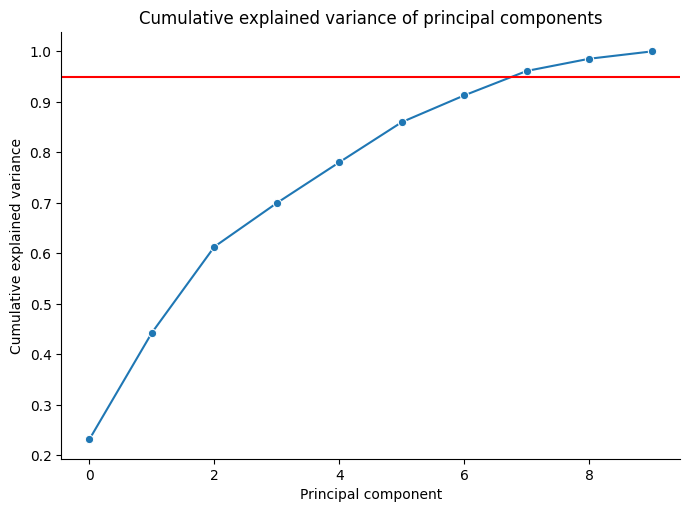

In [10]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_of_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title="Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.95,
            color = 'red');

In [11]:
# Fit the PCA object to the scaled features dataframe and transform it
pca_variance_df_quantile = pca_variance.fit_transform(moosic5000_df_quantile)

# The dataframe now contains the principal components of the scaled features dataframe
pca_variance_df_quantile

,,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7
name,id,artist,,,,,,,,
Se Eu Quiser Falar Com Deus,1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,-0.729671,-0.139347,-0.248897,0.439848,0.422183,-0.313861,0.261424,0.164519
Saudade De Bahia,5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,0.310666,-0.661455,-0.005181,-0.178715,0.014044,0.168588,-0.143364,0.012193
"Canta Canta, Minha Gente",0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,0.244417,-0.465402,0.365942,-0.072702,-0.352514,-0.383829,0.171351,0.495418
Mulher Eu Sei,3mXqOdlLE1k67WsAxryPFs,Chico César,0.313472,-0.569567,-0.191460,0.006066,0.341278,-0.335777,0.112596,0.238358
Rosa Morena,7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,0.326745,-0.519573,-0.379956,0.108301,0.019988,0.160737,0.066398,0.069197
...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,0.499826,0.060160,-0.881613,-0.030762,-0.292363,-0.105121,0.193328,-0.073322
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,0.473496,0.075651,-0.896363,0.172336,-0.331510,-0.052487,0.166777,-0.186029
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,0.475609,0.214132,-1.105388,0.428370,-0.300664,-0.055840,0.084000,0.003408


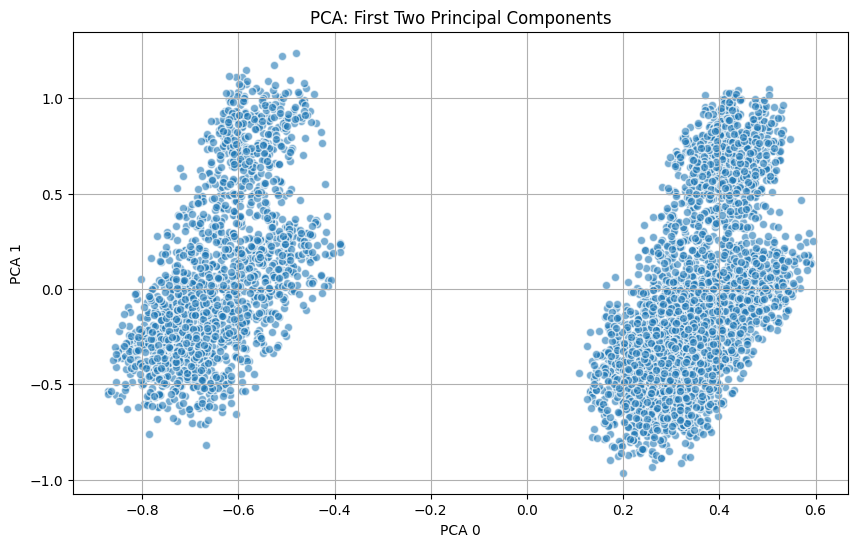

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_variance_df_quantile['pca0'], pca_variance_df_quantile['pca1'], alpha=0.6, edgecolors='w')
plt.title('PCA: First Two Principal Components')
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')
plt.grid(True)
plt.show()


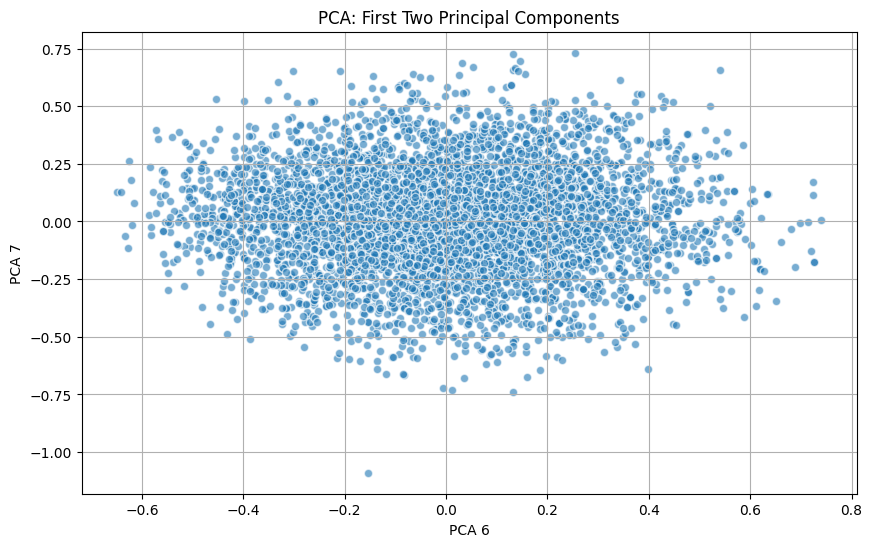

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_variance_df_quantile['pca6'], pca_variance_df_quantile['pca7'], alpha=0.6, edgecolors='w')
plt.title('PCA: First Two Principal Components')
plt.xlabel('PCA 6')
plt.ylabel('PCA 7')
plt.grid(True)
plt.show()


# Now apply clusters

## Estimate the number of clusters between 25-40

## 1. Inertia and elbow method

In [14]:
#list(range(1,50+1))

In [30]:
# Decide on a random_state to use
seed = 123

# Set the maximum number of clusters to try
max_k = 40

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for k in range(25, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = k,
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(pca_variance_df_quantile)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

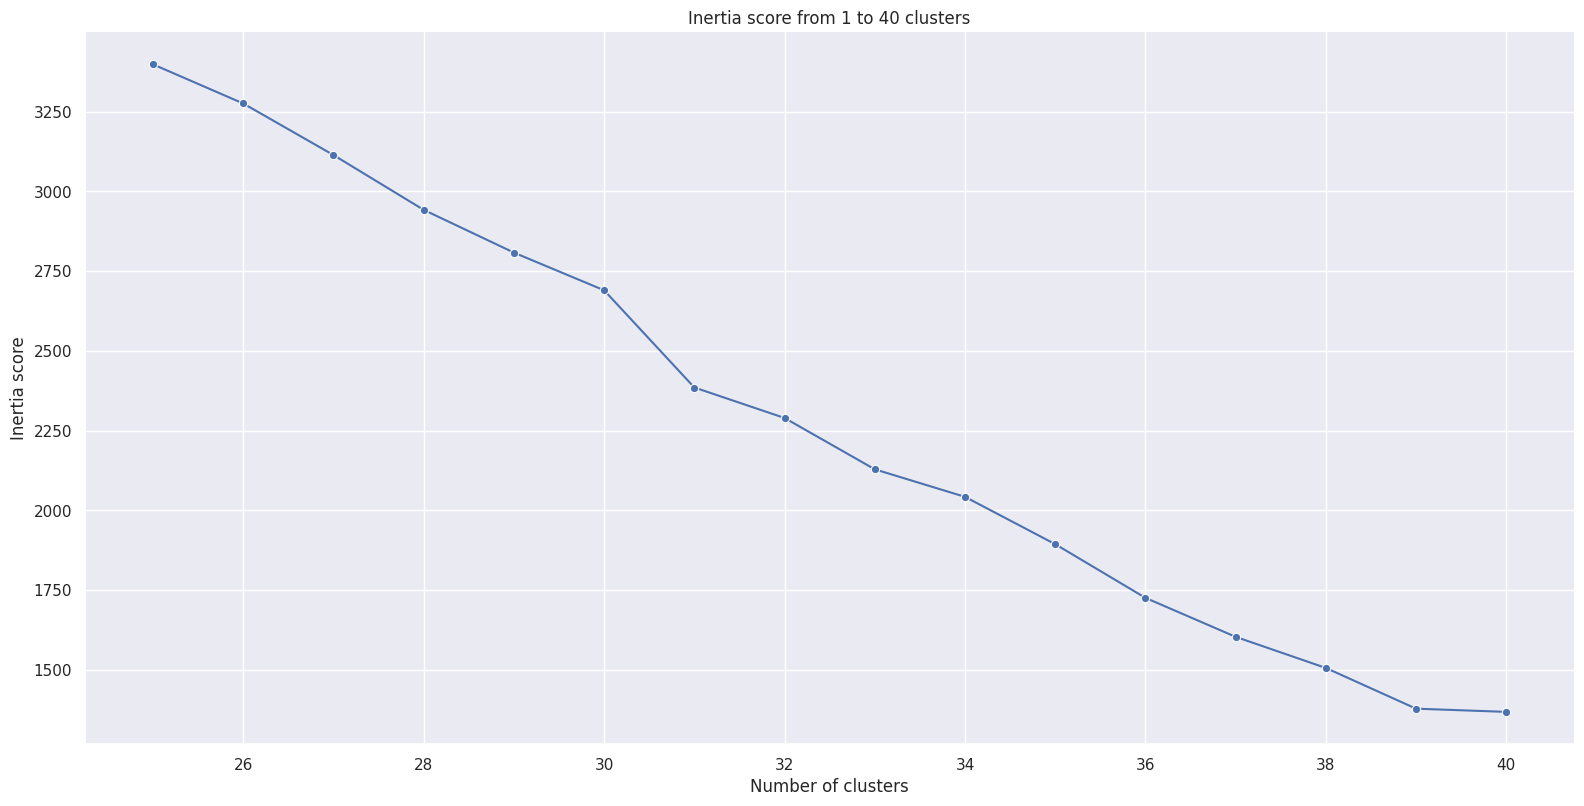

In [31]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(25, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In my opinion k=30 here.

## 2. The Silhoutte score

In [32]:
# Set the maximum number of clusters to try
max_k = 40

# Create an empty list to store the silhouette scores
sil_scores = []


for j in range(25, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = j,
                    n_init = "auto",
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(pca_variance_df_quantile)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(pca_variance_df_quantile, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)

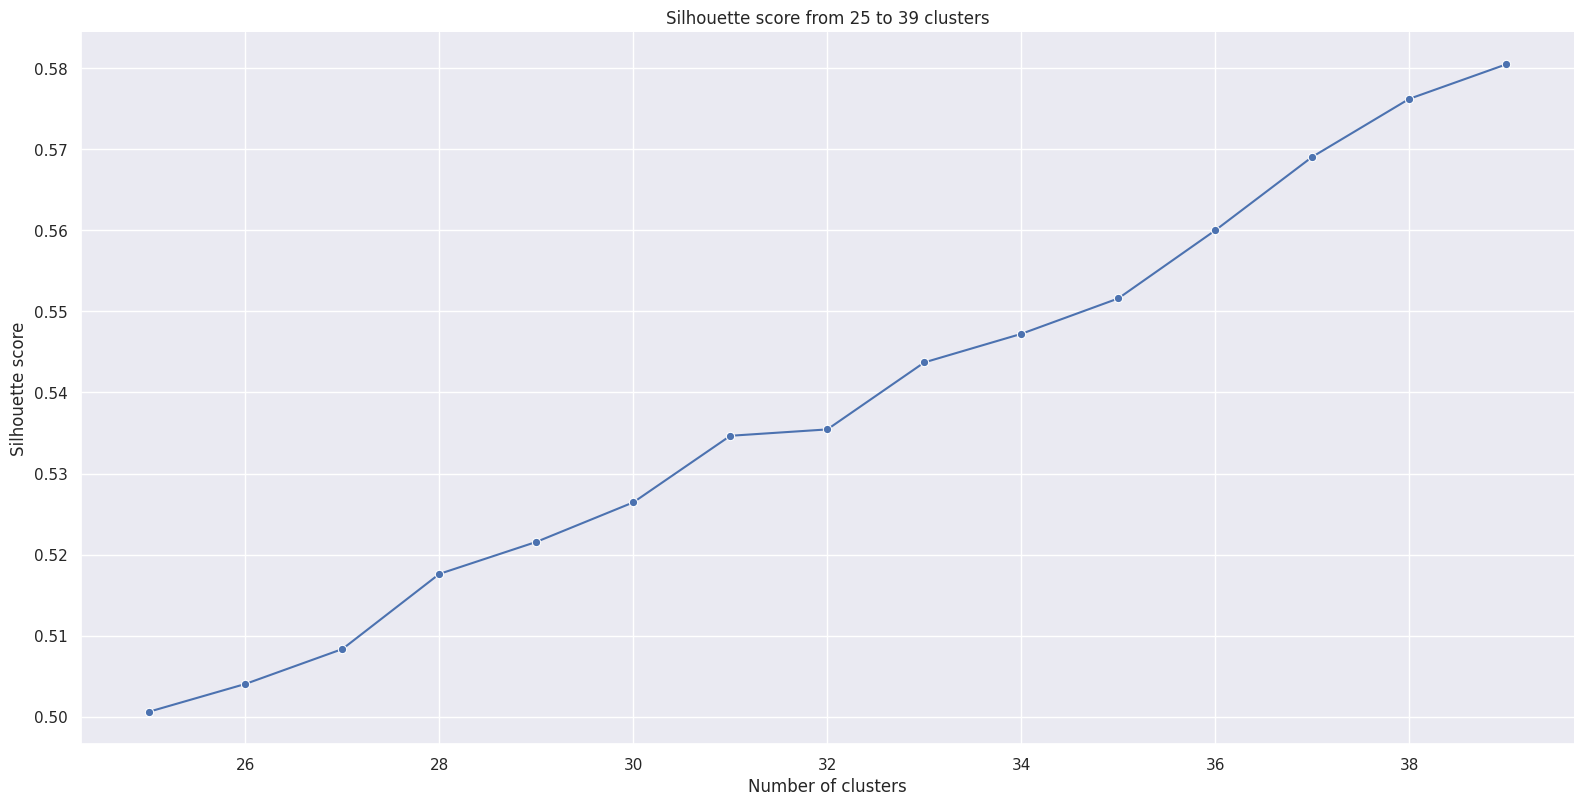

In [34]:
(
sns.relplot(y = sil_scores,
            x = range(25, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 25 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

The highest point is at 39 for me. So 39 clusters

In [35]:
from sklearn.metrics import silhouette_score

score = silhouette_score(pca_variance_df_quantile, labels)
print(f"Silhouette Score: {score:.4f}")  # Should usually be between -1.0 and 1.0

Silhouette Score: 0.5805


In [36]:
from sklearn.cluster import KMeans

# Let's say you have PCA-reduced features in `pca_df`
kmeans = KMeans(n_clusters=39, random_state=123)
pca_variance_df_quantile['cluster'] = kmeans.fit_predict(pca_variance_df_quantile)

In [37]:
moosic5000_df_quantile['cluster'] = kmeans.labels_

In [22]:
for i in range(4):
    print(f"\n🎧 Songs in Cluster {i}:")
    display(pca_variance_df_quantile[pca_variance_df_quantile['cluster'] == i])



🎧 Songs in Cluster 0:


,,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,cluster
name,id,artist,,,,,,,,,
I Melt With You,3VsYJCWecqxdwAN2Xu3cL5,Modern English,0.347129,0.341513,0.169415,0.274199,0.179087,0.325198,-0.153726,-0.113761,0
King Of The Beach,6Jyi5nq9lvIQLEOCbv1s3Y,Wavves,0.242831,0.334605,0.707012,0.463771,0.445836,0.161422,0.064594,0.022118,0
Just Like Honey,1LwP9g1Hjbs64jXM2Qsxry,The Jesus and Mary Chain,0.371485,0.152903,-0.157213,0.226195,-0.285323,0.401362,-0.271939,-0.026588,0
Red Eyes,4HZoJRRNuCaxIAiozUpydz,The War On Drugs,0.324261,0.178129,0.112569,0.327084,0.370564,0.427717,-0.262308,0.033007,0
Talking Backwards,0cCq9wWxSs7Gj9oCNKqN56,Real Estate,0.416109,0.200810,-0.010074,-0.092839,0.292431,0.426085,-0.439921,0.102906,0
...,...,...,...,...,...,...,...,...,...,...,...
Songs für Liam,21LQVYZKQYSWWzKlNzt4oq,Kraftklub,0.324290,0.177358,0.718532,-0.230376,0.080906,0.153429,0.117851,-0.029353,0
Baila Conmigo (feat. Kelly Ruiz),4Clmg1g8n2yBYG13Z1oSdG,Dayvi,0.273063,0.189130,0.535096,0.143266,0.184908,-0.008851,-0.192553,0.391152,0
Follow God,2QpGZOhTCHHiKmpSO9FW4h,Kanye West,0.343996,0.204084,0.581040,-0.339663,-0.409325,0.462280,0.364595,-0.026548,0



🎧 Songs in Cluster 1:


,,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,cluster
name,id,artist,,,,,,,,,
Se Eu Quiser Falar Com Deus,1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,-0.729671,-0.139347,-0.248897,0.439848,0.422183,-0.313861,0.261424,0.164519,1
Madalena,33u3dO0JWjerYpFN61J3ug,Maria Gasolina,-0.723774,-0.318419,-0.476318,0.449368,-0.116354,-0.089437,-0.065093,0.424289,1
Blue Bossa - Remastered,26g2HsIOznFYeJWR9zhRXZ,Joe Henderson,-0.608344,-0.176384,-0.441040,-0.069095,-0.223891,-0.201218,-0.208524,0.352173,1
Aqua De Coco,1OzHkIzGMj4S3rWwF8TBjc,Marcos Valle,-0.764853,-0.262404,0.053330,0.356851,0.193491,-0.473443,-0.165189,0.378905,1
Mas Que Nada,51P5Djwsur61UY4oitktOQ,Rio Combo,-0.641834,-0.365134,-0.243987,-0.089057,0.116486,-0.263789,-0.509883,0.098306,1
...,...,...,...,...,...,...,...,...,...,...,...
Blessed & Highly Favored - Live,2BiCH1atqXX1OXOtL0PKHS,The Clark Sisters,-0.673177,-0.042160,0.154851,-0.049568,0.281414,-0.556051,0.376346,-0.167763,1
You Brought The Sunshine - Live,2yK4879j9Q1XnJio6ETqJV,The Clark Sisters,-0.760861,0.038084,0.366566,0.299566,-0.342421,0.151462,0.380313,-0.230756,1
In The Room,0Toq1jVrrLqQXUGh2Kcn1p,Lexi,-0.667739,-0.119251,-0.103943,0.023576,0.092565,-0.344449,0.436357,-0.296064,1



🎧 Songs in Cluster 2:


,,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,cluster
name,id,artist,,,,,,,,,
Desafinado,5pstSsK0G4q86gdyy1Spqh,Stan Getz,0.394290,-0.195778,-0.340184,-0.137614,0.072435,0.294719,0.356846,0.283363,2
Não Sei,52mwxbVQOtYXntgvyXyBc4,Sílvia Pérez Cruz,-0.505274,-0.099698,-0.735882,-0.389561,0.325108,-0.225330,0.186114,-0.096844,2
Aquarela Do Brasil,3ftxaxht5yQW99vNcibmUC,Carlos Barbosa-Lima,-0.537171,-0.032355,-0.797903,-0.136233,-0.200596,-0.201602,-0.088364,0.266896,2
Brigas Nunca Mais,5gvBgfXusUpxjOWHyYJXVg,Brazilian Jazz,0.484795,-0.143831,-0.624522,-0.380586,-0.037626,-0.237902,0.031244,0.293182,2
Aquarela Do Brasil,3pjbCjL1IlqOfuQ8YOkX6o,Voyager,0.378291,-0.076787,-0.729803,0.407670,-0.322869,0.040826,0.005791,0.270070,2
...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,0.499826,0.060160,-0.881613,-0.030762,-0.292363,-0.105121,0.193328,-0.073322,2
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,0.473496,0.075651,-0.896363,0.172336,-0.331510,-0.052487,0.166777,-0.186029,2
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,0.475609,0.214132,-1.105388,0.428370,-0.300664,-0.055840,0.084000,0.003408,2



🎧 Songs in Cluster 3:


,,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,cluster
name,id,artist,,,,,,,,,
Saudade De Bahia,5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,0.310666,-0.661455,-0.005181,-0.178715,0.014044,0.168588,-0.143364,0.012193,3
"Canta Canta, Minha Gente",0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,0.244417,-0.465402,0.365942,-0.072702,-0.352514,-0.383829,0.171351,0.495418,3
Mulher Eu Sei,3mXqOdlLE1k67WsAxryPFs,Chico César,0.313472,-0.569567,-0.191460,0.006066,0.341278,-0.335777,0.112596,0.238358,3
Rosa Morena,7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,0.326745,-0.519573,-0.379956,0.108301,0.019988,0.160737,0.066398,0.069197,3
O Meu Amor É Glòria,0ylJQpV3K4XnhWhLDMFmH7,Sílvia Pérez Cruz,0.261925,-0.185147,0.277461,0.270650,0.169803,-0.529750,0.268704,0.410191,3
...,...,...,...,...,...,...,...,...,...,...,...
Just As Sure,3nSixKwsNItNoeAQCJqTd7,Tori Kelly,0.209210,-0.418901,0.197933,0.434057,0.072786,0.211698,0.484096,-0.072392,3
Talkin' 'Bout Jesus,0Va3lL2FGZZMU5Myuj9dWp,Gloria Gaynor,0.269111,-0.425214,0.454638,-0.102597,-0.419753,-0.156708,0.007723,-0.163215,3
Ask For Rain,2OxoHNoWHhIn6oGi7IbJpV,Gene Moore,0.342306,-0.317477,-0.175592,0.208137,0.532864,-0.153135,0.201528,-0.418865,3


## 2D Scatterplot of PCA Components Colored by Cluster

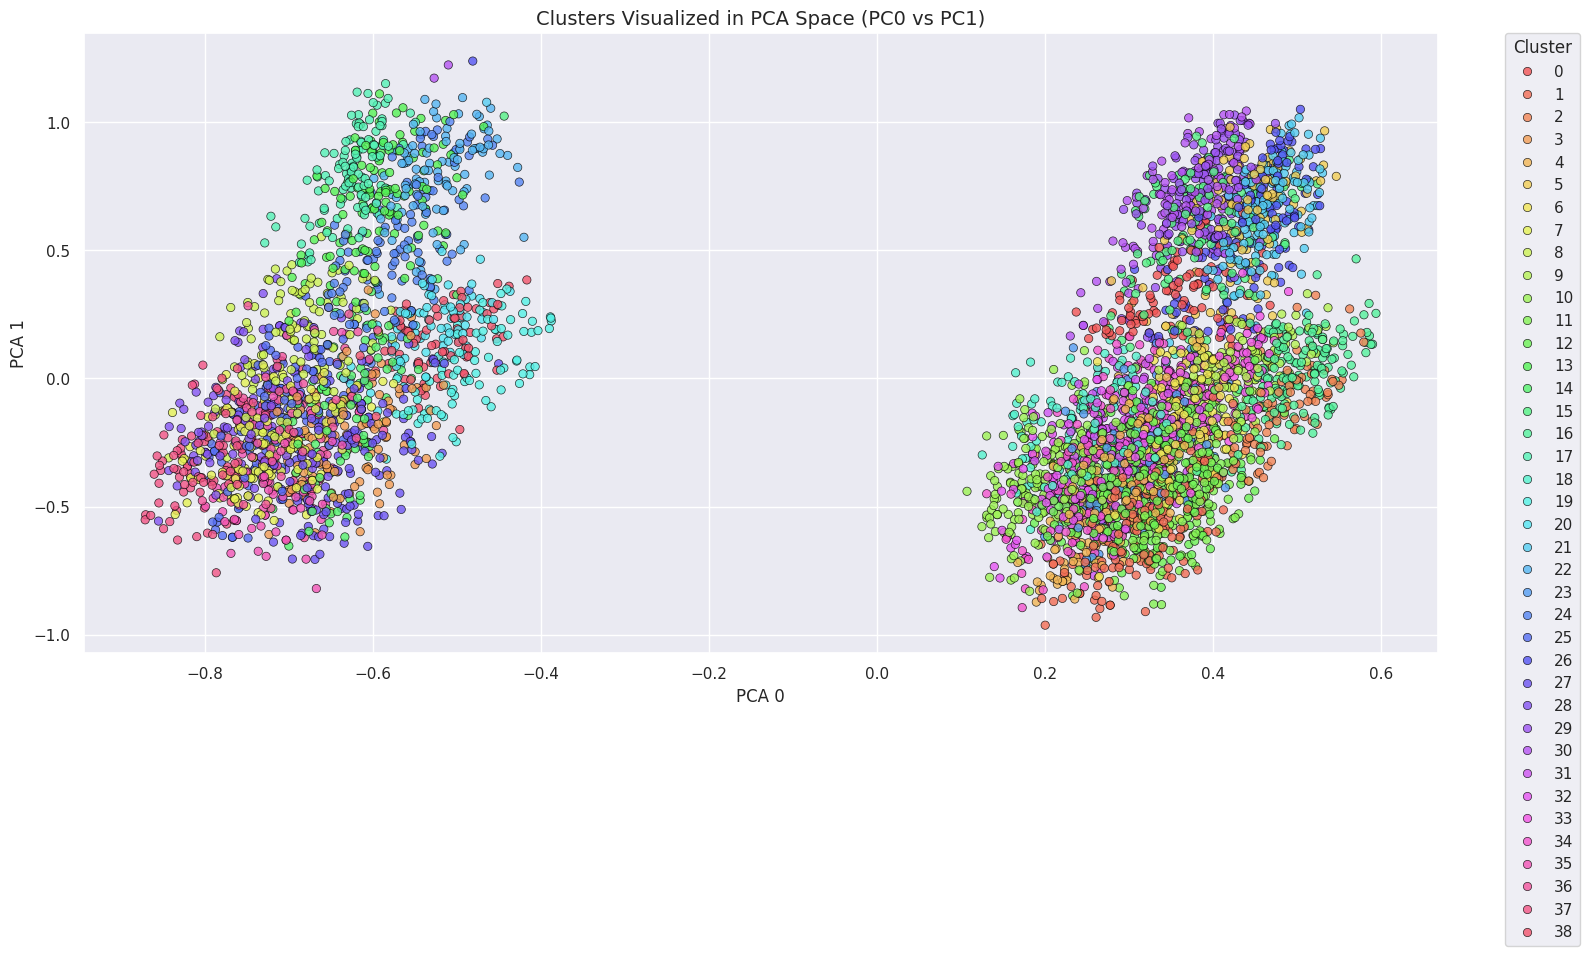

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys

# Generate 39 visually distinct colors using HSV space
def get_distinct_colors(n):
    hues = [i / n for i in range(n)]
    return [colorsys.hsv_to_rgb(h, 0.65, 0.95) for h in hues]

palette_39_distinct = get_distinct_colors(39)

plt.figure(figsize=(16, 9))
sns.scatterplot(
    data=pca_variance_df_quantile,
    x='pca0',
    y='pca1',
    hue='cluster',
    palette=palette_39_distinct,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)
plt.title('Clusters Visualized in PCA Space (PC0 vs PC1)', fontsize=14)
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(True)
plt.tight_layout()
plt.show()


## Radar chart

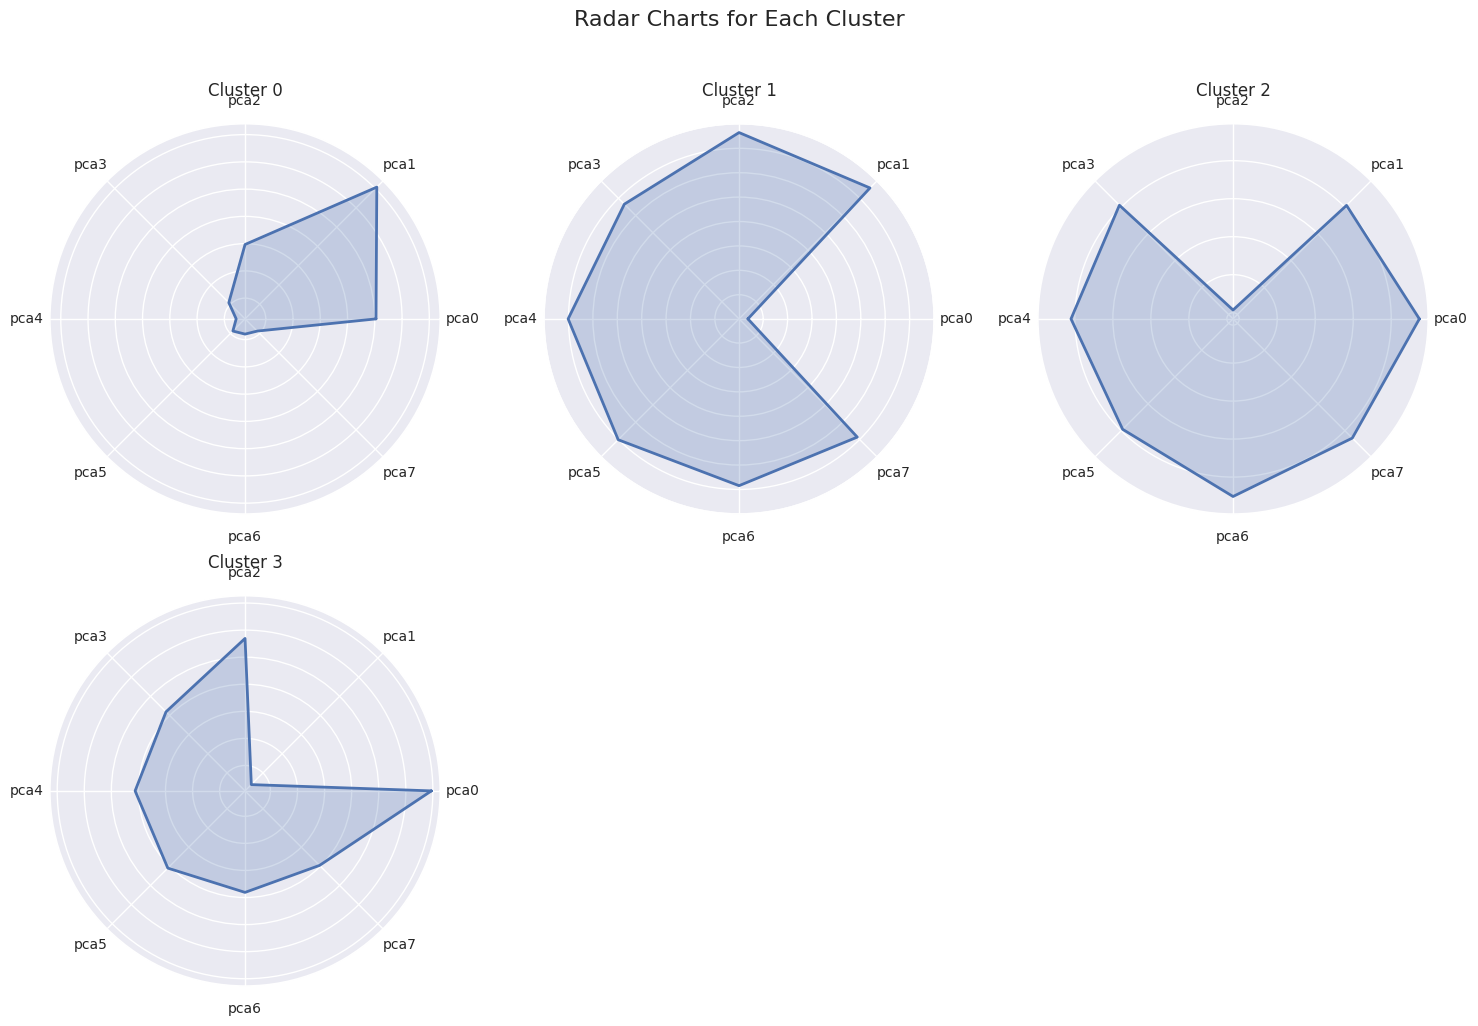

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Prepare data
cluster_means = pca_variance_df_quantile.groupby('cluster').mean()
features = cluster_means.columns
num_vars = len(features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Step 2: Plot setup
num_clusters = len(cluster_means)
cols = 3  # you can change this depending on how many clusters you have
rows = int(np.ceil(num_clusters / cols))
fig, axes = plt.subplots(rows, cols, subplot_kw=dict(polar=True), figsize=(cols * 5, rows * 5))
axes = axes.flatten()

# Step 3: Plot radar for each cluster
for i, (cluster, row) in enumerate(cluster_means.iterrows()):
    values = row.tolist()
    values += values[:1]  # close the loop
    ax = axes[i]
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_title(f'Cluster {cluster}', size=12, pad=20)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=10)
    ax.set_yticklabels([])

# Step 4: Hide unused subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Radar Charts for Each Cluster", size=16, y=1.02)
plt.tight_layout()
#save the file
#plt.savefig("radar_per_cluster.png", dpi=300)
plt.show()